# Importing Neccessary Libraries

In [20]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D,Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.optimizers import Adam

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
from sklearn import datasets,metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Loading the Built-in Sklearn Breast Cancer Dataset

In [23]:
cancerData = datasets.load_breast_cancer()

In [24]:
X = pd.DataFrame(data = cancerData.data, columns=cancerData.feature_names )
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [25]:
y = cancerData.target

In [26]:
X.shape

(569, 30)

# Splitting into Train and Test datasets

In [27]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.1,stratify=y)

In [28]:
X_train.shape

(512, 30)

In [29]:
y_test.shape

(57,)

# Applying StandardScaler()

In [30]:
scaler = StandardScaler()

In [31]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Reshaping the dataset to 3-D to pass it through CNN

In [32]:
X_train = X_train.reshape(512,30,1)
X_test = X_test.reshape(57,30,1)

# Preparing the Model

In [33]:
model = Sequential()
model.add(Conv1D(filters=16,kernel_size=2,activation='relu',input_shape=(30,1)))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(32,2,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 29, 16)            48        
_________________________________________________________________
batch_normalization_2 (Batch (None, 29, 16)            64        
_________________________________________________________________
dropout_3 (Dropout)          (None, 29, 16)            0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 28, 32)            1056      
_________________________________________________________________
batch_normalization_3 (Batch (None, 28, 32)            128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 28, 32)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 896)              

In [35]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='binary_crossentropy',metrics=['accuracy'])

In [36]:
history = model.fit(X_train,y_train,epochs=35,verbose=1,validation_data=(X_test,y_test))

Train on 512 samples, validate on 57 samples
Epoch 1/35
512/512 [==============================] - 1s 2ms/sample - loss: 0.9711 - accuracy: 0.5352 - val_loss: 0.6497 - val_accuracy: 0.7193
Epoch 2/35
512/512 [==============================] - 0s 159us/sample - loss: 0.6452 - accuracy: 0.6797 - val_loss: 0.5717 - val_accuracy: 0.8421
Epoch 3/35
512/512 [==============================] - 0s 150us/sample - loss: 0.4521 - accuracy: 0.7852 - val_loss: 0.5118 - val_accuracy: 0.8246
Epoch 4/35
512/512 [==============================] - 0s 156us/sample - loss: 0.3574 - accuracy: 0.8438 - val_loss: 0.4674 - val_accuracy: 0.8070
Epoch 5/35
512/512 [==============================] - 0s 147us/sample - loss: 0.2879 - accuracy: 0.8770 - val_loss: 0.4324 - val_accuracy: 0.7895
Epoch 6/35
512/512 [==============================] - 0s 147us/sample - loss: 0.2909 - accuracy: 0.8770 - val_loss: 0.4050 - val_accuracy: 0.7719
Epoch 7/35
512/512 [==============================] - 0s 155us/sample - loss: 0.2

# Plots of Accuracy and Loss

In [37]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='upper left')
  plt.show()

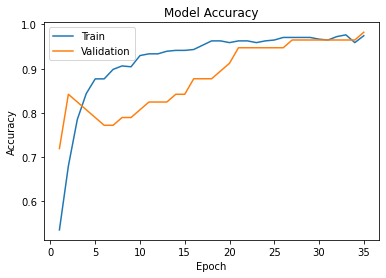

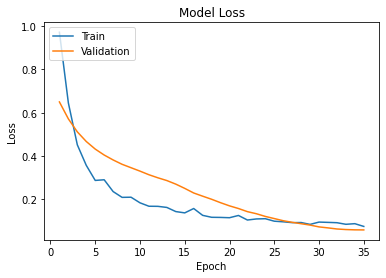

In [38]:
plotLearningCurve(history,35)